Here i am doing ols using pca on whole data

In [1]:
import numpy as np
import pandas as pd

In [3]:
user_growth=pd.read_csv("/content/user_growth.csv")

In [4]:
user_growth.head()

,year,month,week,total_customers,total_orders,agg_aov,total_campaigns,total_impressions,total_clicks,total_conversions,total_spend,total_revenue,num_apps,num_emails,num_smss,Social Media,roas
0,2023,3,11,21,198,1219.826667,27,169828,15068,1586,80695.52,172823.03,9,6,3,9,2.14
1,2023,3,12,31,379,1103.348765,63,340251,35455,3757,197122.33,373701.77,13,21,17,12,1.90
2,2023,3,13,22,229,1070.185660,45,231460,25405,2743,133515.46,254295.60,9,13,16,7,1.90
3,2023,4,13,9,82,1095.342963,18,108768,9852,931,60599.81,102264.01,7,3,3,5,1.69
4,2023,4,14,36,400,1140.620118,63,351381,34418,3678,194767.81,405625.46,13,14,17,19,2.08


In [5]:
y=user_growth['total_customers']
x=user_growth.drop(columns='total_customers')

In [6]:
x

,year,month,week,total_orders,agg_aov,total_campaigns,total_impressions,total_clicks,total_conversions,total_spend,total_revenue,num_apps,num_emails,num_smss,Social Media,roas
0,2023,3,11,198,1219.826667,27,169828,15068,1586,80695.52,172823.03,9,6,3,9,2.14
1,2023,3,12,379,1103.348765,63,340251,35455,3757,197122.33,373701.77,13,21,17,12,1.90
2,2023,3,13,229,1070.185660,45,231460,25405,2743,133515.46,254295.60,9,13,16,7,1.90
3,2023,4,13,82,1095.342963,18,108768,9852,931,60599.81,102264.01,7,3,3,5,1.69
4,2023,4,14,400,1140.620118,63,351381,34418,3678,194767.81,405625.46,13,14,17,19,2.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,2024,10,42,361,1050.838824,63,339399,37739,3603,180789.02,355748.22,16,14,16,17,1.97
99,2024,10,43,290,1137.433125,63,369738,33130,3204,191352.91,374875.43,16,15,16,16,1.96
100,2024,10,44,139,1185.816765,36,152418,19551,2074,92676.86,214216.38,12,13,11,0,2.31
101,2024,11,44,109,894.246897,27,167654,16606,1486,82122.99,156076.92,7,12,5,3,1.90


In [ ]:
x.columns

Index(['year', 'month', 'week', 'total_orders', 'agg_aov', 'total_campaigns',
       'total_impressions', 'total_clicks', 'total_conversions', 'total_spend',
       'total_revenue', 'num_apps', 'num_emails', 'num_smss', 'Social Media',
       'roas'],
      dtype='object')

In [7]:
df=user_growth.copy()

In [8]:
from sklearn.preprocessing import StandardScaler

X = df[['year', 'month', 'week', 'total_orders', 'agg_aov', 'total_campaigns',
        'total_impressions', 'total_clicks', 'total_conversions', 'total_spend',
        'total_revenue', 'num_apps', 'num_emails', 'num_smss', 'Social Media', 'roas']]

y = df['total_customers']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

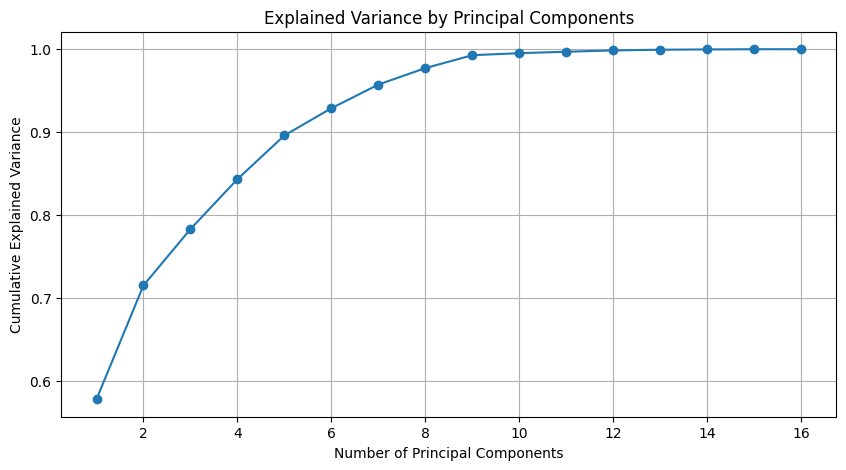

In [9]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Explained variance ratio
explained_var = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(10,5))
plt.plot(range(1, len(explained_var)+1), explained_var, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Principal Components')
plt.grid()
plt.show()

In [10]:
import numpy as np

# Get eigenvalues of X'X (or of the correlation matrix)
eigenvalues = np.linalg.eigvals(np.corrcoef(X_scaled, rowvar=False))
condition_indices = np.sqrt(max(eigenvalues) / eigenvalues)

for i, ci in enumerate(condition_indices):
    print(f"Component {i+1}: Condition Index = {ci:.2f}")

Component 1: Condition Index = 1.00
Component 2: Condition Index = 2.05
Component 3: Condition Index = 2.91
Component 4: Condition Index = 3.10
Component 5: Condition Index = 3.31
Component 6: Condition Index = 4.19
Component 7: Condition Index = 4.50
Component 8: Condition Index = 5.39
Component 9: Condition Index = 6.08
Component 10: Condition Index = 15.35
Component 11: Condition Index = 18.29
Component 12: Condition Index = 19.09
Component 13: Condition Index = 26.04
Component 14: Condition Index = 40.65
Component 15: Condition Index = 47.12
Component 16: Condition Index = 108939371.69


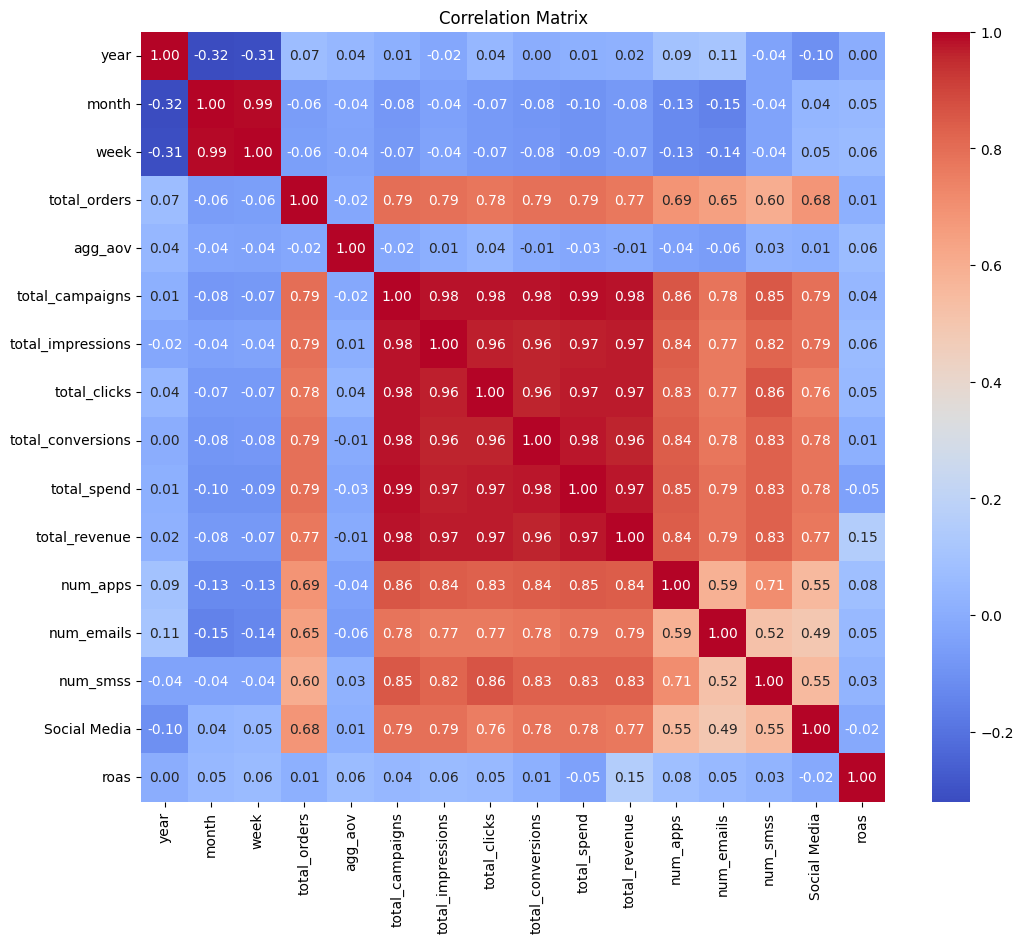

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

corr = pd.DataFrame(X_scaled, columns=X.columns).corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [12]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

X_df = pd.DataFrame(X_scaled, columns=X.columns)
vif_data = pd.DataFrame()
vif_data["Feature"] = X_df.columns
vif_data["VIF"] = [variance_inflation_factor(X_df.values, i) for i in range(X_df.shape[1])]

print(vif_data.sort_values("VIF", ascending=False))

              Feature         VIF
5     total_campaigns         inf
13           num_smss         inf
14       Social Media         inf
11           num_apps         inf
12         num_emails         inf
9         total_spend  148.447883
10      total_revenue  122.582797
2                week   88.851141
1               month   88.671641
8   total_conversions   34.498440
6   total_impressions   33.054417
7        total_clicks   32.423777
15               roas    5.480763
3        total_orders    3.081921
0                year    1.335842
4             agg_aov    1.136630


/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [14]:
from sklearn.linear_model import LinearRegression

k = 8  # or whatever gives you good explained variance
X_pca_k = X_pca[:, :k]

X_train, X_test, y_train, y_test = train_test_split(X_pca_k, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("R² score:", r2_score(y_test, y_pred))

R² score: 0.8946039337251646


In [ ]:
X_pca

array([[ 4.10897702e+00, -1.35835073e+00,  1.11853825e+00, ...,
         8.41079069e-03,  1.86316627e-02,  1.05862792e-17],
       [-2.27165041e+00, -1.23229013e+00, -6.02542441e-01, ...,
        -3.50865640e-02,  2.86643277e-03,  1.20558974e-16],
       [ 1.25917365e+00, -1.25752310e+00, -6.62371532e-01, ...,
        -9.09547781e-02, -2.26791913e-02, -1.06448898e-16],
       ...,
       [ 3.25339885e+00,  8.29827881e-01,  2.32163604e+00, ...,
        -9.31908257e-02,  6.45587333e-02, -2.25514859e-16],
       [ 4.54319297e+00,  1.06643712e+00, -1.04682987e+00, ...,
         1.30348354e-01, -1.62901867e-02, -9.59984112e-17],
       [ 6.30110939e+00,  1.06667615e+00,  6.25528016e-01, ...,
         2.27733635e-02, -4.41853364e-02, -7.69111646e-17]])

In [17]:
import statsmodels.api as sm

# Assuming X_pca is your PCA-transformed data (n_samples x 16)
# Select first 8 principal components
X_ols = X_pca[:, :16]

# Add a constant term (intercept) for OLS regression
X_ols_const = sm.add_constant(X_ols)

# Fit the OLS model
model = sm.OLS(y, X_ols_const).fit()

# Display the summary table
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        total_customers   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     97.05
Date:                Tue, 08 Apr 2025   Prob (F-statistic):           1.34e-47
Time:                        16:39:54   Log-Likelihood:                -228.81
No. Observations:                 103   AIC:                             489.6
Df Residuals:                      87   BIC:                             531.8
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         24.2718      0.239    101.468      0.0

In [15]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge = Ridge()
params = {'alpha': [0.1, 1, 10, 100]}
grid = GridSearchCV(ridge, params, cv=5, scoring='r2')
grid.fit(X_scaled, y)

print("Best alpha:", grid.best_params_)
print("Best R² score:", grid.best_score_)

Best alpha: {'alpha': 1}
Best R² score: 0.9118410312975745


here i am doing ols after removing some predictors and pca

In [19]:
x_new=x.drop(columns=['total_orders',"agg_aov","total_spend",	'total_revenue'])

In [20]:
X_scaled_new = scaler.fit_transform(x_new)

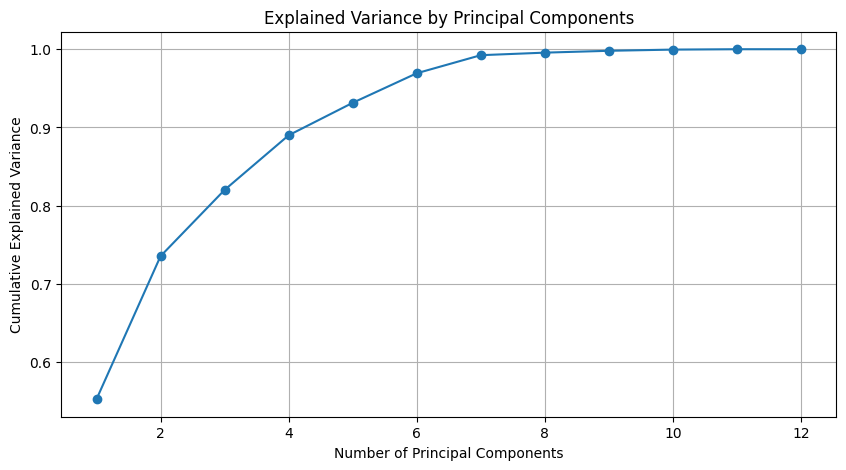

In [21]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

pca = PCA()
X_pca_new = pca.fit_transform(X_scaled_new)

# Explained variance ratio
explained_var = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(10,5))
plt.plot(range(1, len(explained_var)+1), explained_var, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Principal Components')
plt.grid()
plt.show()

In [23]:
# Get eigenvalues of X'X (or of the correlation matrix)
eigenvalues = np.linalg.eigvals(np.corrcoef(X_scaled_new, rowvar=False))
condition_indices = np.sqrt(max(eigenvalues) / eigenvalues)

for i, ci in enumerate(condition_indices):
    print(f"Component {i+1}: Condition Index = {ci:.2f}")

Component 1: Condition Index = 1.00
Component 2: Condition Index = 1.74
Component 3: Condition Index = 2.55
Component 4: Condition Index = 2.81
Component 5: Condition Index = 3.65
Component 6: Condition Index = 3.82
Component 7: Condition Index = 4.89
Component 8: Condition Index = 13.05
Component 9: Condition Index = 15.27
Component 10: Condition Index = 19.10
Component 11: Condition Index = 33.59
Component 12: Condition Index = 92941644.47


In [29]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# If X_pca_new is a NumPy array, convert it to a DataFrame
X_df = pd.DataFrame(X_pca_new, columns=[f'PC{i+1}' for i in range(X_pca_new.shape[1])])

# Calculate VIF for each principal component
vif_data = pd.DataFrame()
vif_data['Principal Component'] = X_df.columns
vif_data['VIF'] = [variance_inflation_factor(X_df.values, i) for i in range(X_df.shape[1])]

print(vif_data)

   Principal Component  VIF
0                  PC1  1.0
1                  PC2  1.0
2                  PC3  1.0
3                  PC4  1.0
4                  PC5  1.0
5                  PC6  1.0
6                  PC7  1.0
7                  PC8  1.0
8                  PC9  1.0
9                 PC10  1.0
10                PC11  1.0
11                PC12  1.0


In [30]:
X_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
0,-3.580469,-1.338050,0.675850,-1.916913,0.215669,0.514417,0.595821,-0.121002,0.057299,0.169815,0.016859,-2.079888e-16
1,1.791327,-1.229631,-0.697552,-1.245361,0.705735,-1.287389,-0.554711,0.177636,0.048576,0.150798,-0.025670,-3.431407e-16
2,-0.998109,-1.270485,-0.690281,-1.392001,-0.295490,-1.057633,-0.865454,0.221892,-0.011086,0.128025,-0.096648,2.931192e-16
3,-5.136727,-1.274212,-1.895873,-1.120333,-0.386521,-0.021513,0.537995,-0.262892,0.043588,-0.006755,0.096305,1.164523e-15
4,1.736581,-0.596627,0.117420,-1.694098,0.225009,0.621284,-0.526953,0.129181,-0.029588,0.155270,0.110796,-1.001341e-16
...,...,...,...,...,...,...,...,...,...,...,...,...
98,1.670176,1.208105,0.201203,1.431691,-0.192807,0.453425,-0.064084,0.105918,0.258358,0.091215,-0.022672,1.151528e-16
99,1.440900,1.215113,0.197743,1.487062,-0.101450,0.204312,-0.002938,-0.300433,-0.282443,-0.038434,-0.053331,8.538566e-17
100,-2.634677,0.849192,2.637771,1.173321,-0.526212,-1.560671,-0.026079,0.448460,-0.021847,-0.127415,-0.131869,2.257522e-16
101,-3.787958,0.983705,0.120208,1.812076,0.415077,-1.009251,-0.051342,-0.209021,-0.001419,0.111536,0.115343,9.819355e-17


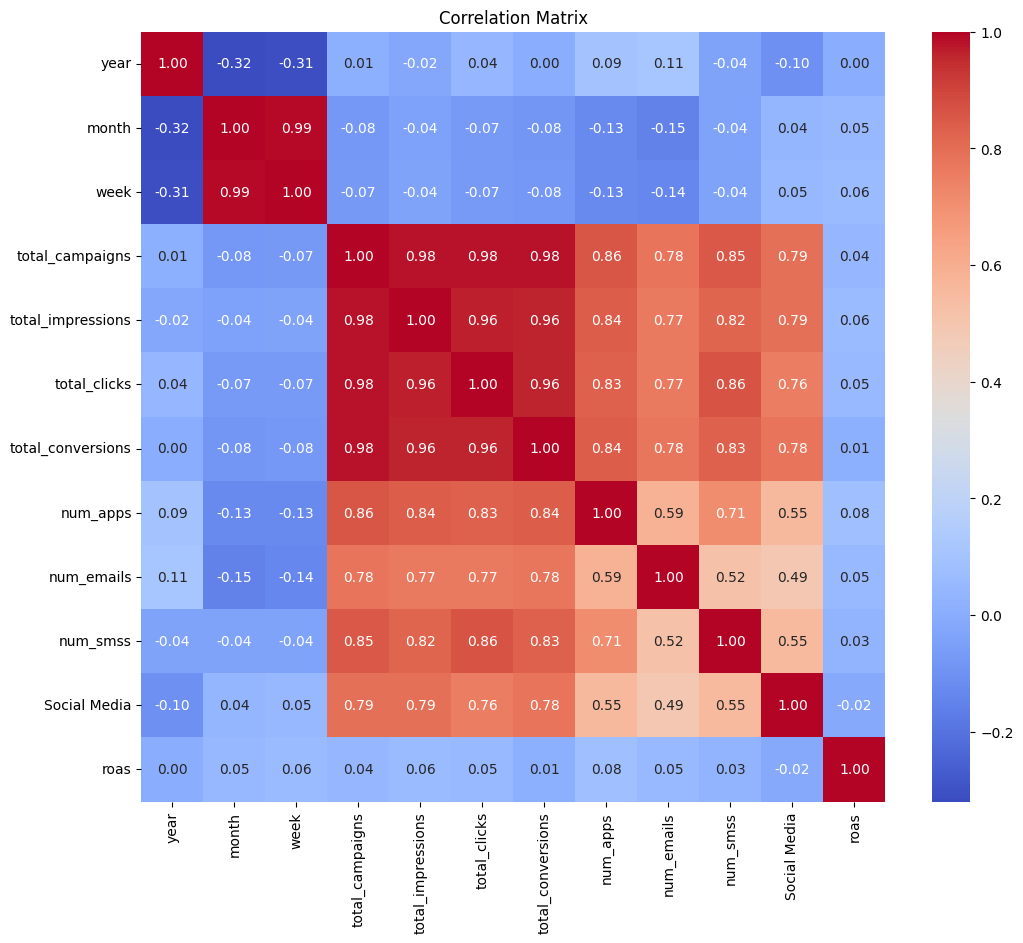

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

corr = pd.DataFrame(X_scaled_new, columns=x_new.columns).corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [28]:
import statsmodels.api as sm

# Assuming X_pca is your PCA-transformed data (n_samples x 16)
# Select first 8 principal components
X_ols_new = X_pca_new[:, :7]

# Add a constant term (intercept) for OLS regression
X_ols_const = sm.add_constant(X_ols_new)

# Fit the OLS model
model_new = sm.OLS(y, X_ols_const).fit()

# Display the summary table
print(model_new.summary())

                            OLS Regression Results                            
Dep. Variable:        total_customers   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     31.92
Date:                Tue, 08 Apr 2025   Prob (F-statistic):           2.40e-22
Time:                        17:03:27   Log-Likelihood:                -314.60
No. Observations:                 103   AIC:                             645.2
Df Residuals:                      95   BIC:                             666.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         24.2718      0.526     46.101      0.0

ols after removing ['total_orders',"agg_aov","roas",'total_revenue']

In [31]:
df=user_growth.copy()

In [33]:
x_new=x.drop(columns=['total_orders',"agg_aov","roas",'total_revenue'])

In [36]:
X_scaled_new = scaler.fit_transform(x_new)

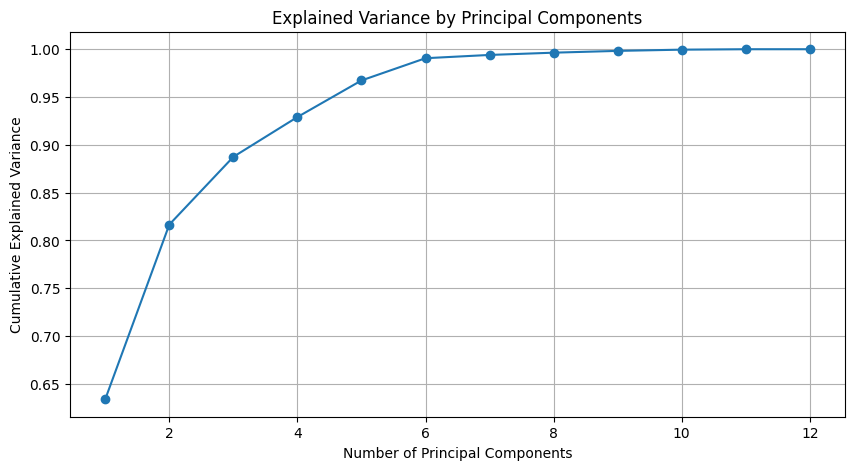

In [37]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

pca = PCA()
X_pca_new = pca.fit_transform(X_scaled_new)

# Explained variance ratio
explained_var = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(10,5))
plt.plot(range(1, len(explained_var)+1), explained_var, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Principal Components')
plt.grid()
plt.show()

In [38]:
# Get eigenvalues of X'X (or of the correlation matrix)
eigenvalues = np.linalg.eigvals(np.corrcoef(X_scaled_new, rowvar=False))
condition_indices = np.sqrt(max(eigenvalues) / eigenvalues)

for i, ci in enumerate(condition_indices):
    print(f"Component {i+1}: Condition Index = {ci:.2f}")

Component 1: Condition Index = 1.00
Component 2: Condition Index = 1.86
Component 3: Condition Index = 2.99
Component 4: Condition Index = 3.90
Component 5: Condition Index = 4.07
Component 6: Condition Index = 5.22
Component 7: Condition Index = 13.63
Component 8: Condition Index = 16.35
Component 9: Condition Index = 18.40
Component 10: Condition Index = 22.27
Component 11: Condition Index = 37.10
Component 12: Condition Index = 100200614.81


In [39]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# If X_pca_new is a NumPy array, convert it to a DataFrame
X_df = pd.DataFrame(X_pca_new, columns=[f'PC{i+1}' for i in range(X_pca_new.shape[1])])

# Calculate VIF for each principal component
vif_data = pd.DataFrame()
vif_data['Principal Component'] = X_df.columns
vif_data['VIF'] = [variance_inflation_factor(X_df.values, i) for i in range(X_df.shape[1])]

print(vif_data)

   Principal Component  VIF
0                  PC1  1.0
1                  PC2  1.0
2                  PC3  1.0
3                  PC4  1.0
4                  PC5  1.0
5                  PC6  1.0
6                  PC7  1.0
7                  PC8  1.0
8                  PC9  1.0
9                 PC10  1.0
10                PC11  1.0
11                PC12  1.0


In [40]:
import statsmodels.api as sm

# Assuming X_pca is your PCA-transformed data (n_samples x 16)
# Select first 8 principal components
X_ols_new = X_pca_new[:, :7]

# Add a constant term (intercept) for OLS regression
X_ols_const = sm.add_constant(X_ols_new)

# Fit the OLS model
model_new = sm.OLS(y, X_ols_const).fit()

# Display the summary table
print(model_new.summary())

                            OLS Regression Results                            
Dep. Variable:        total_customers   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     32.03
Date:                Tue, 08 Apr 2025   Prob (F-statistic):           2.14e-22
Time:                        17:37:11   Log-Likelihood:                -314.47
No. Observations:                 103   AIC:                             644.9
Df Residuals:                      95   BIC:                             666.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         24.2718      0.526     46.158      0.0